In [307]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as sp 
import matplotlib.animation as animation

In [4]:
foxes = 10 
rabbits = 100

In [7]:
t = np.linspace(0,1,10)


array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [85]:
def simulate(f_0, r_0):
    t = np.linspace(0, 2, 2)
    rabbits = np.empty([len(t)])
    foxes = np.empty([len(t)])
    
    rabbits[0] = r_0
    foxes[0] = f_0
    print(rabbits)
    print(foxes)
    for i in range(len(t)-1):
        print(i)
        dR = 0.002*rabbits[i] - 0.2*foxes[i]*rabbits[i]
        dF = 0.2*foxes*rabbits[i] - 0.5*foxes[i] 
        rabbits[i+1] = rabbits[i] + dR
        foxes[i+1] = foxes[i] + dF
    plt.plot(t,foxes, 'ro')
    plt.plot(t, rabbits, 'bo')

In [86]:
rabbits = np.empty([10,])
rabbits

array([ 0.1 ,  0.2 ,  0.25,  0.5 ,  1.  ,  2.  ,  2.5 ,  5.  , 10.  ,
       20.  ])

In [88]:
rabbits[1] = rabbits[0] + 10

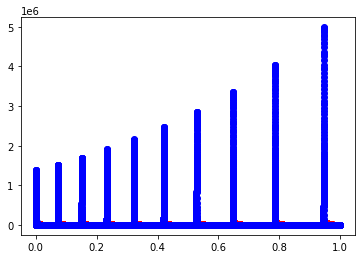

In [153]:
r_0 = 9000
f_0 = 200
t = np.linspace(0, 1, 100000)
rabbits = np.empty([len(t)])
foxes = np.empty([len(t)])

rabbits[0] = r_0
foxes[0] = f_0
for i in range(len(t)-1):    
    dR = 6/f_0*rabbits[i] - 10/(r_0*f_0)*foxes[i]*rabbits[i]
    dF = 0.1/(f_0*r_0)*foxes[i]*rabbits[i] - 0.15*foxes[i]/f_0 
    rabbits[i+1] = rabbits[i] + dR
    foxes[i+1] = foxes[i] + dF
plt.plot(t,(foxes), 'ro')
plt.plot(t, (rabbits), 'bo')

In [161]:
np.random.rand(2)

array([0.47592865, 0.37145825])

In [301]:
class Rabbit: 
    def __init__(self, v, ax):
        self.v = v #how fast the rabbit is
        self.ax = ax
        self.fear = 1
        self.alive = True
        self.terror = False 
        
    # state functions 
    def born(self):
        self.x = np.random.rand(1)
        self.y = np.random.rand(1)
    def move(self):
        if self.terror:
            theta = self.angle(self.predator)
        else:
            theta = 2*np.pi*np.random.rand(1)
        self.x = self.x + np.cos(theta)*self.v*self.fear
        self.y = self.y + np.sin(theta)*self.v*self.fear
    def aware(self, f):
        self.predator = f
        self.terror = True
    
    def die(self):
        self.alive = False
    
    
    def dist(self, f):
        return np.sqrt((self.x - f.x)**2 + (self.y - f.y)**2)
    def angle(self, f):
        return np.arctan((self.y - f.y)/(self.x - f.x))
    
    def show(self):
        if self.alive:
            self.ax.plot(self.x, self.y, 'b*')
            
    
            

class Fox: 
    def __init__(self, v, ax):
        self.v = v #how fast the rabbit is
        self.ax = ax
        self.hunger = 1
        self.alive = True
        self.hunt = False
        
    # state functions
    def born(self):
        self.x = np.random.rand(1)
        self.y = np.random.rand(1)
    def target(self, r):
        self.prey = r
        self.hunt = True
    def status(self, t):
        self.hunger = self.hunger*1.15
    
    # action functions
    def move(self):
        if self.hunt: 
            theta = self.angle(self.prey) 
        else:
            theta = 2*np.pi*np.random.rand(1)
        self.x = self.x + np.cos(theta)*self.v*self.hunger
        self.y = self.y + np.sin(theta)*self.v*self.hunger  
        
    def die(self):
        self.alive = False

    #helper functions
    def dist(self, r):
        return np.sqrt((self.x - r.x)**2 + (self.y - r.y)**2)
    def angle(self, r):
        return np.arctan((self.y - r.y)/(self.x - r.x))
    
    def show(self):
        if self.alive:
            self.ax.plot(self.x, self.y, 'r^')
        
def interact(f, r):
    if ((MSE(f,r))>= 0.1) & ((MSE(f,r))< 1):
        if f.hunt == False:
            print('hunt started')
            f.target(r)
    if ((MSE(f,r))>= 0.1) & ((MSE(f,r))< 0.5):
        if r.terror == False:
            print('prey terrified')
            r.aware(f)
    
    if (MSE(f,r))< 0.1:
        f.die()
        r.die()
    

    

0.3030865239172744


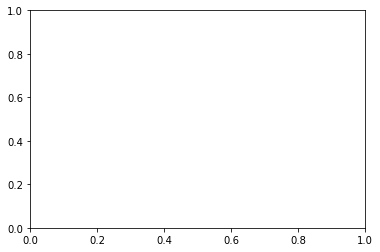

In [334]:
fig, ax = plt.subplots(1,1)
r = Rabbit(0.5, ax)
f = Fox(0.1, ax)
f.born()
r.born()

f_loc = np.empty([10, 2])
for i in range(10):
    f.move()
    f_loc[i, 0] = f.x
    f_loc[i, 1]= f.y
print(f_loc[3, 1])